# 1.7 20th Century Network Visualization

## Load Libraries and Import Data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data
relationship_df = pd.read_csv('20th_century_relationship.csv', index_col = 0)

In [3]:
relationship_df.head()

,source,target,value
0,France,Italy,10
1,Italy,Russia,6
2,Germany,Russia,26
3,Austria,Germany,17
4,Austria,Hungary,6


## Create Network Object

In [4]:
G = nx.from_pandas_edgelist(relationship_df, 
                            source = 'source', 
                            target = 'target', 
                            edge_attr = 'value', 
                            create_using = nx.Graph())

## Static Network Graph (NetworkX)

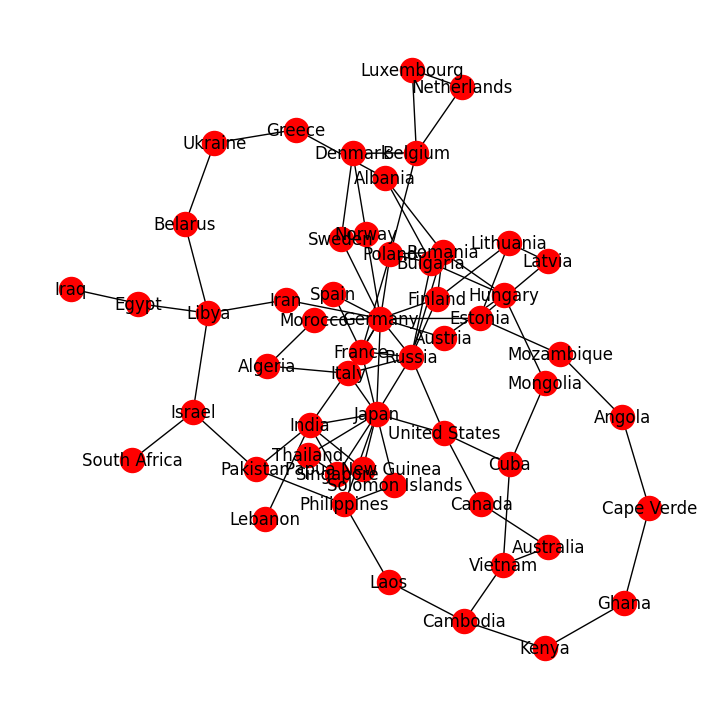

In [5]:
h = plt.figure(figsize = (7, 7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

In [6]:
# Save graph
h.savefig('networkx_plt_20th_century.png')

## Interactive Network Graph (PyVis)

In [7]:
# Define net object
net = Network()
net = Network(notebook = True, width = '900px', height = '800px', bgcolor = '#222222', font_color = 'white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Set up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show('20th_century.html') # Save as an html file

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Community Detection (Leiden Algorithm)

In [8]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'bayanpy', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [9]:
new_com = coms.to_node_community_map()

In [10]:
# Put the output from new_com into a dictionary
dict_com = {k:v[0] for k,v in new_com.items()}

In [11]:
dict_com

{'Japan': 0,
 'Thailand': 0,
 'Singapore': 0,
 'Solomon Islands': 0,
 'Philippines': 0,
 'India': 0,
 'Pakistan': 0,
 'Israel': 0,
 'South Africa': 0,
 'Papua New Guinea': 0,
 'Lebanon': 0,
 'France': 1,
 'Italy': 1,
 'Germany': 1,
 'Spain': 1,
 'Denmark': 1,
 'Norway': 1,
 'Sweden': 1,
 'Morocco': 1,
 'Algeria': 1,
 'Russia': 2,
 'Austria': 2,
 'Hungary': 2,
 'Bulgaria': 2,
 'Poland': 2,
 'Finland': 2,
 'Albania': 2,
 'Romania': 2,
 'Laos': 3,
 'Cambodia': 3,
 'Mongolia': 3,
 'Cuba': 3,
 'United States': 3,
 'Canada': 3,
 'Australia': 3,
 'Vietnam': 3,
 'Estonia': 4,
 'Latvia': 4,
 'Lithuania': 4,
 'Kenya': 4,
 'Ghana': 4,
 'Cape Verde': 4,
 'Angola': 4,
 'Mozambique': 4,
 'Greece': 5,
 'Ukraine': 5,
 'Belarus': 5,
 'Libya': 5,
 'Egypt': 5,
 'Iraq': 5,
 'Iran': 5,
 'Belgium': 6,
 'Netherlands': 6,
 'Luxembourg': 6}

In [12]:
# Rerun network graph with the communities as an argument
nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width = '1300px', height = '700px', bgcolor = '#222222', font_color = 'white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html") # Save as an html file

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


#### I believe the above partitions make sense according to history. We can conclude that Germany was the most active country during the 20th century, as it has the biggest node and the edges connecting to it are thicker. Japan, Russia, and France were also very active. While the United States is directly connected to Russia and Japan, it's node is smaller and it is part of a separate community, indicating that it was perhaps more of a secondary player rather than a primary player during the 20th century.

## Centrality

In [13]:
# Degree Centrality
degree_dict = nx.degree_centrality(G)

In [14]:
# Turn into dataframe
degree_df = pd.DataFrame(degree_dict.items(), columns = ['countries', 'centrality'])

In [15]:
degree_df.sort_values(by = ['centrality'], ascending = False, inplace = True)

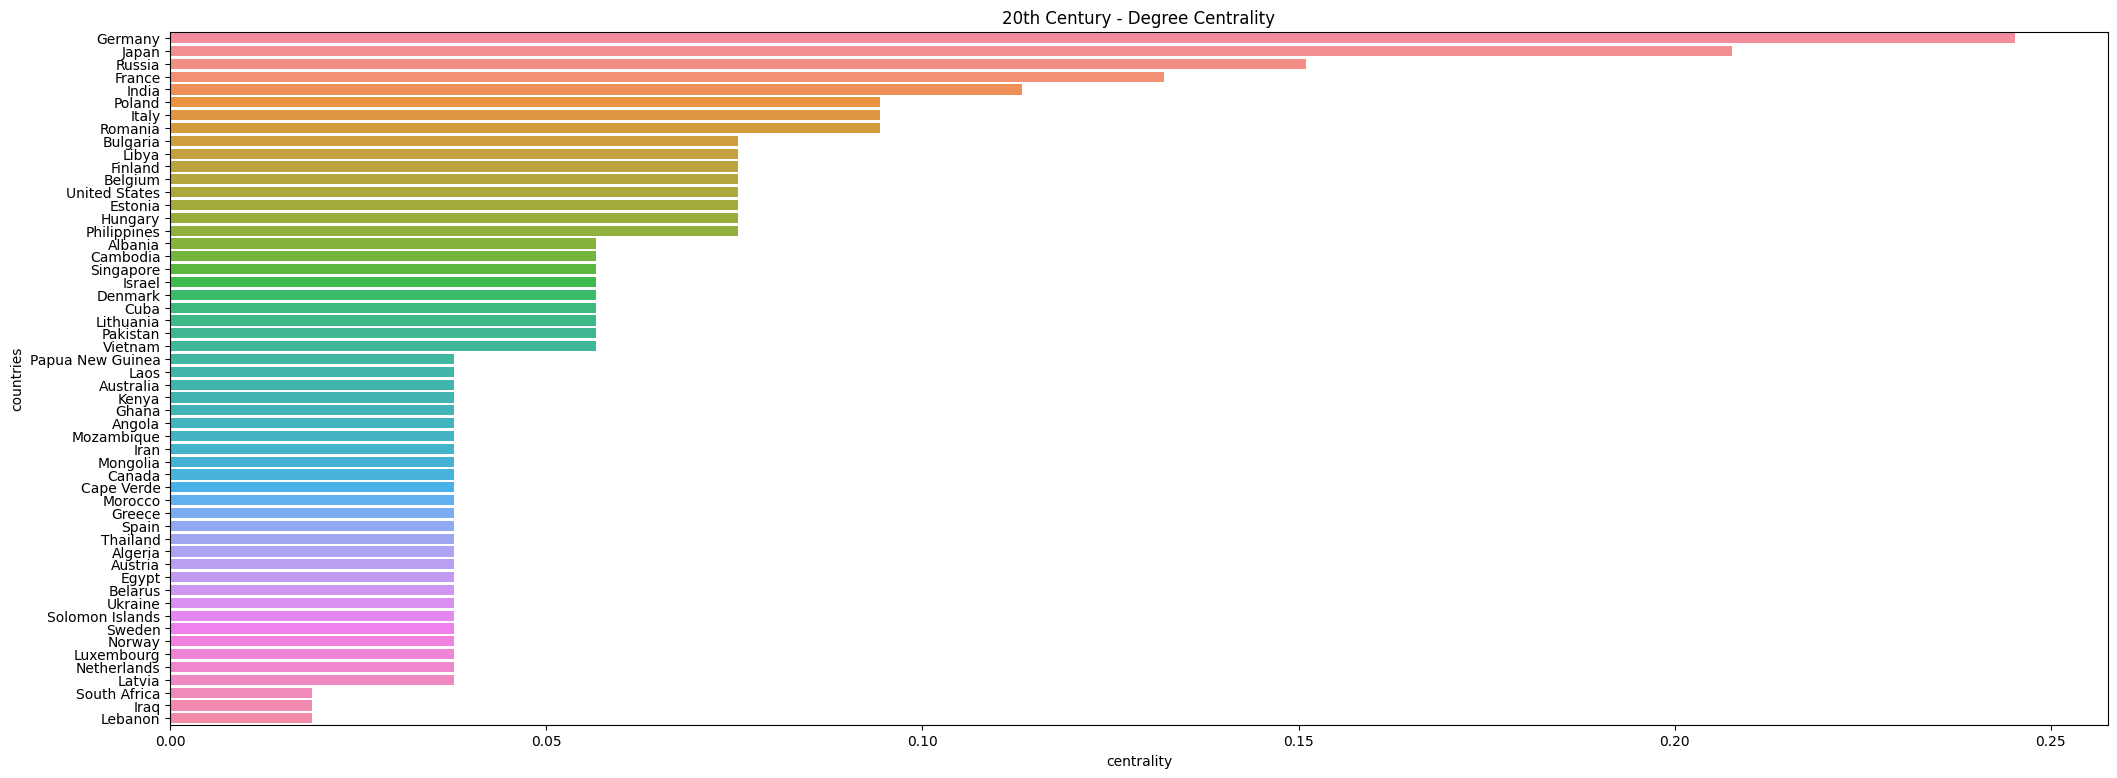

In [16]:
# Plot the degree centrality
plt.figure(figsize = (25, 9))
with sns.dark_palette('xkcd:blue', 22):
    sns.barplot(x = 'centrality', y = 'countries',
    saturation = 0.9, data = degree_df).set_title("20th Century - Degree Centrality")

#### The above bar chart shows that Germany is the country with the highest degree of centrality, followed by Japan and then Russia. This means that Germany has the most connections to other countries in the 20th century. This aligns with our previous graphs and with the historical context of World War II being a huge part of that time in history.

In [17]:
# Closeness Centrality
closeness_dict = nx.closeness_centrality(G)

In [18]:
# Turn into dataframe
closeness_df = pd.DataFrame(closeness_dict.items(), columns = ['countries', 'centrality'])

In [19]:
closeness_df.sort_values(by = ['centrality'], ascending = False, inplace = True)

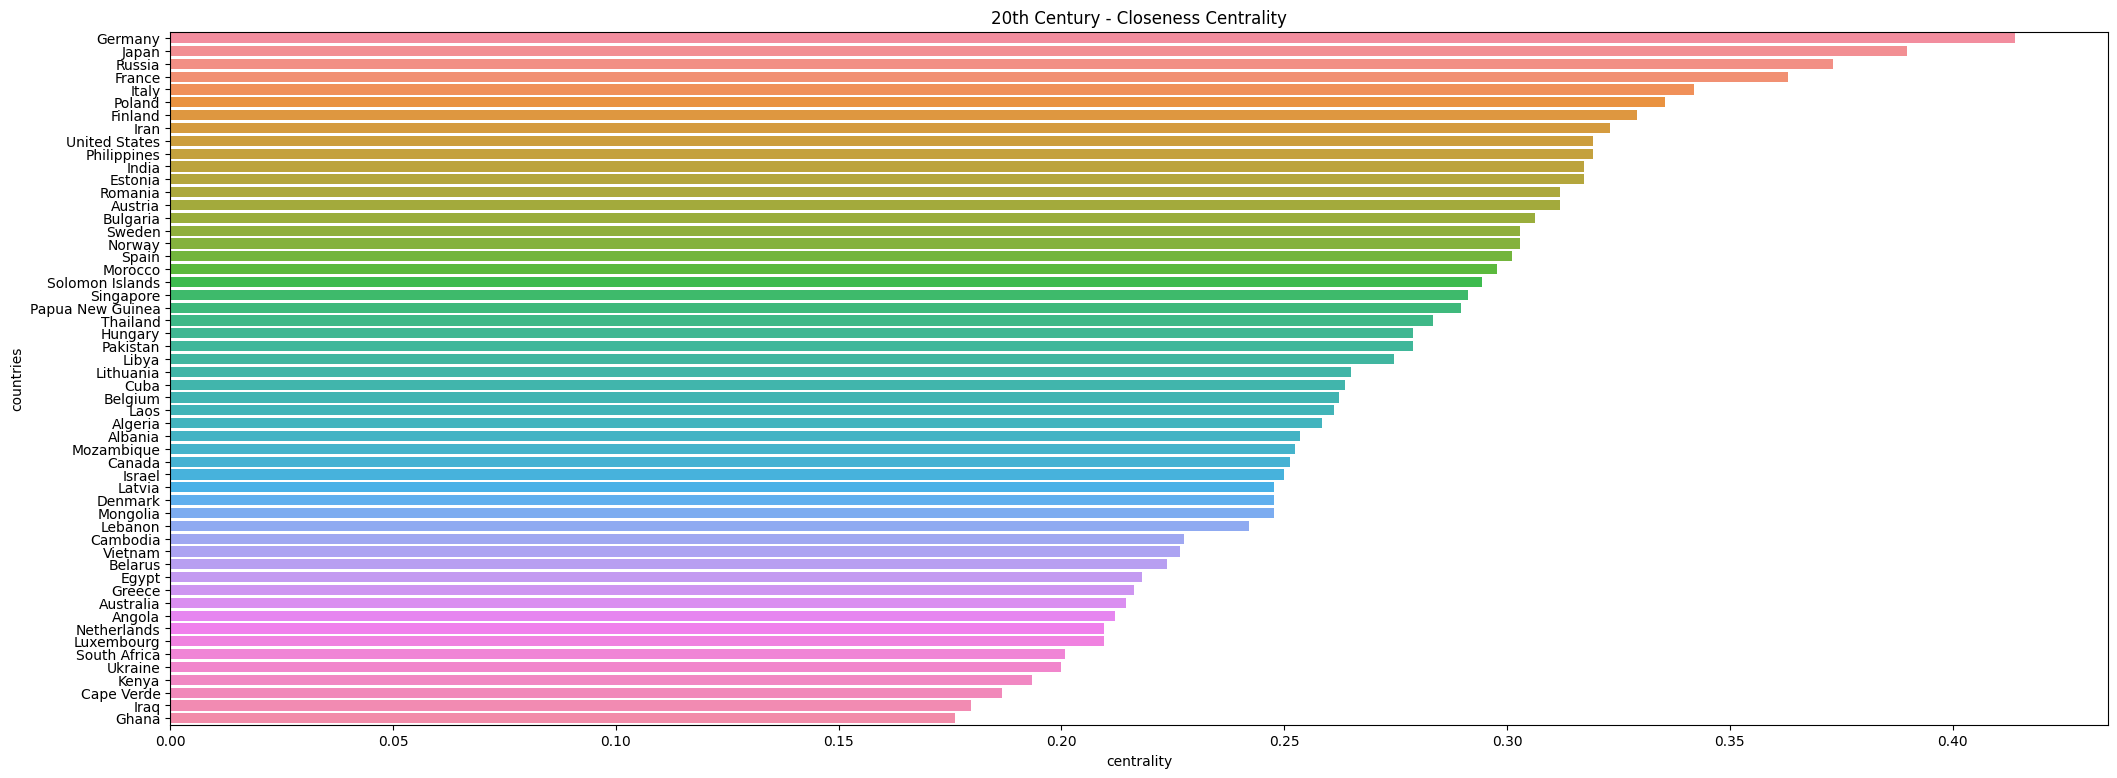

In [20]:
# Plot the closeness centrality
plt.figure(figsize = (25, 9))
with sns.dark_palette('xkcd:blue', 22):
    sns.barplot(x = 'centrality', y = 'countries',
    saturation = 0.9, data = closeness_df).set_title('20th Century - Closeness Centrality')

#### The above bar chart still shows the same top 4 countries, however all of the countries score higher on closeness centrality. This indicates that most of them have some connection to the first few countries.

In [21]:
# Betweenness Centrality
betweenness_dict = nx.betweenness_centrality(G)

In [22]:
# Turn into dataframe
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns = ['countries', 'centrality'])

In [23]:
betweennes_df.sort_values(by = ['centrality'], ascending = False, inplace = True)

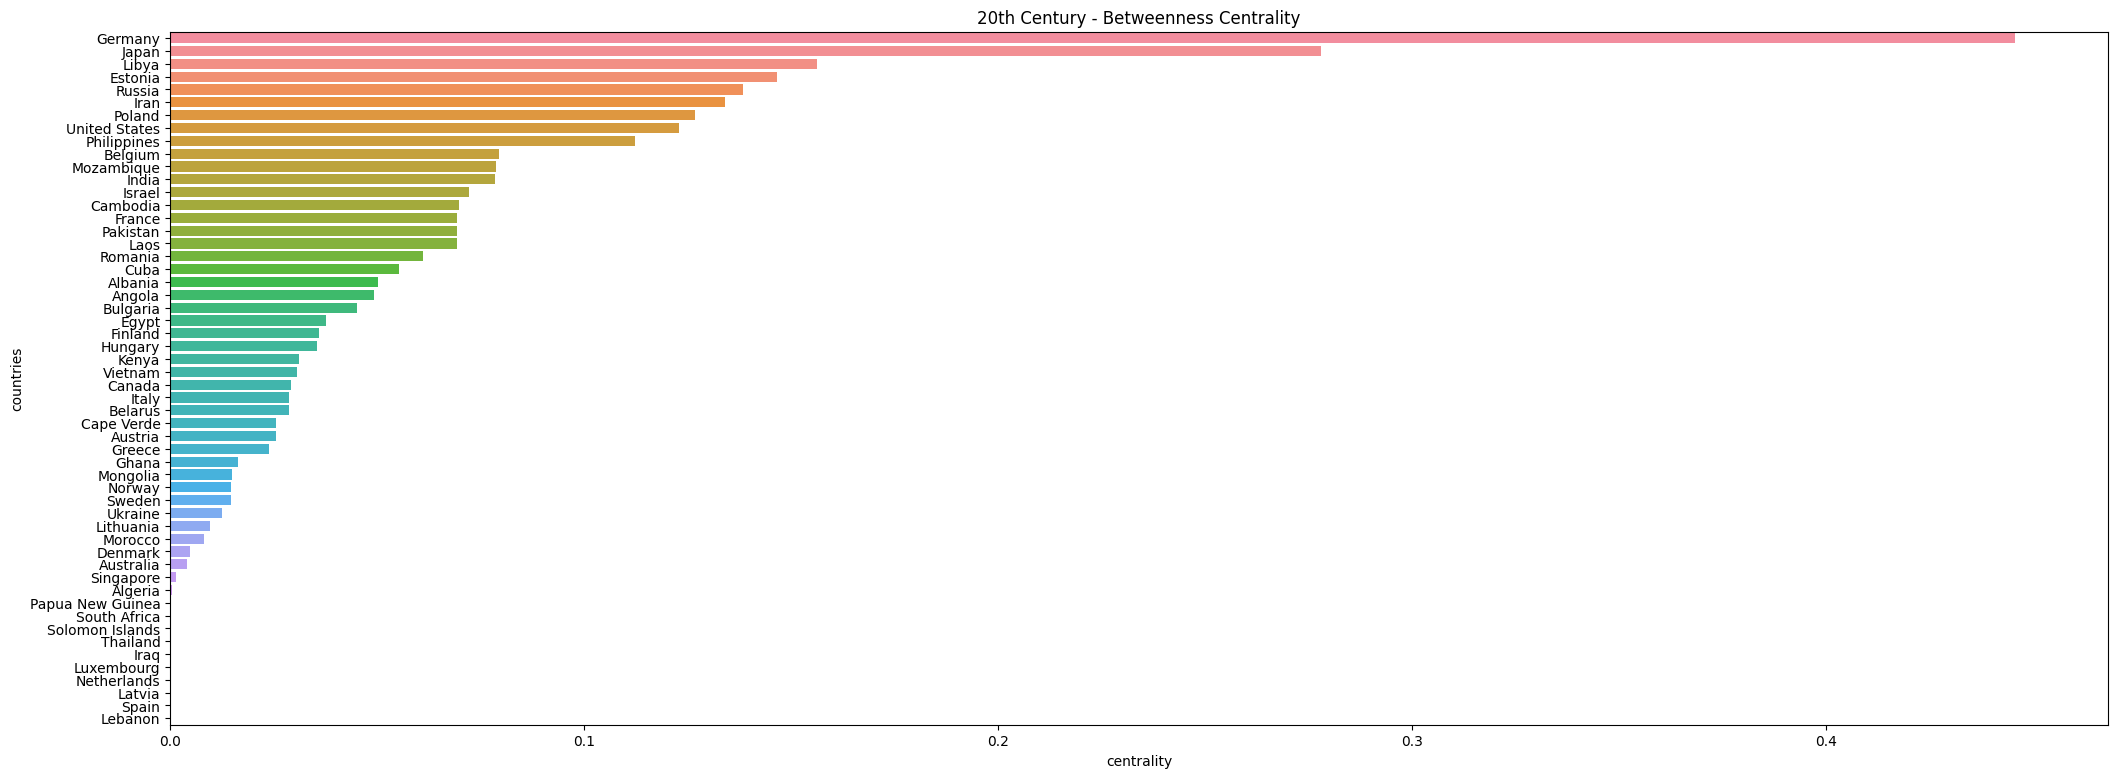

In [24]:
# Plot the betweenness centrality
plt.figure(figsize = (25, 9))
with sns.dark_palette('xkcd:blue', 22):
    sns.barplot(x = 'centrality', y = 'countries',
    saturation = 0.9, data = betweennes_df).set_title('20th Century - Betweenness Centrality')

#### The above bar chart confirms that Germany and Japan were very influential countries during the 20th century. Some of the other top countries have shifted slightly, with Libya and Estonia scoring higher on betweenness centrality than the other centrality measures. This indicates that they are on a higher number of paths.